In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emnist/emnist-letters-mapping.txt
/kaggle/input/emnist/emnist-letters-test.csv
/kaggle/input/emnist/emnist-mnist-mapping.txt
/kaggle/input/emnist/emnist-digits-train.csv
/kaggle/input/emnist/emnist-bymerge-mapping.txt
/kaggle/input/emnist/emnist-balanced-train.csv
/kaggle/input/emnist/emnist-digits-test.csv
/kaggle/input/emnist/emnist-balanced-test.csv
/kaggle/input/emnist/emnist-mnist-test.csv
/kaggle/input/emnist/emnist-letters-train.csv
/kaggle/input/emnist/emnist-byclass-train.csv
/kaggle/input/emnist/emnist-bymerge-test.csv
/kaggle/input/emnist/emnist-balanced-mapping.txt
/kaggle/input/emnist/emnist-mnist-train.csv
/kaggle/input/emnist/emnist-digits-mapping.txt
/kaggle/input/emnist/emnist-bymerge-train.csv
/kaggle/input/emnist/emnist-byclass-test.csv
/kaggle/input/emnist/emnist-byclass-mapping.txt
/kaggle/input/emnist/emnist_source_files/emnist-digits-test-labels-idx1-ubyte
/kaggle/input/emnist/emnist_source_files/emnist-bymerge-train-labels-idx1-ubyte
/kaggle/input/

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import numpy as np
from tensorflow import keras
from keras import layers

In [3]:
#/kaggle/input/emnist/emnist-letters-mapping.txt
testing_letter = pd.read_csv('/kaggle/input/emnist/emnist-letters-test.csv')
training_letter = pd.read_csv('/kaggle/input/emnist/emnist-letters-train.csv')

In [4]:
#training_letters
y1 = np.array(training_letter.iloc[:,0].values)
x1 = np.array(training_letter.iloc[:,1:].values)
#testing_labels
y2 = np.array(testing_letter.iloc[:,0].values)
x2 = np.array(testing_letter.iloc[:,1:].values)
print(y1.shape)
print(x1.shape)

(88799,)
(88799, 784)


In [6]:
# Reshape flattened images to 28x28 and normalize pixel values
x1 = x1.reshape(-1, 28, 28, 1).astype('float32') / 255.0  # Training data
x2 = x2.reshape(-1, 28, 28, 1).astype('float32') / 255.0  # Testing data

print(x1.shape)  
print(x2.shape)  


(88799, 28, 28, 1)
(14799, 28, 28, 1)


In [12]:
import tensorflow as tf

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((x1, y1))
test_dataset = tf.data.Dataset.from_tensor_slices((x2, y2))

# Shuffle, batch, and prefetch the datasets
train_dataset = train_dataset.shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [13]:
from tensorflow.image import resize

def preprocess_emnist(image, label):
    # Resize to 224x224 
    image = resize(image, [224, 224])
    # Convert grayscale to RGB 
    image = tf.image.grayscale_to_rgb(image)
    return image, label

# Apply preprocessing
train_dataset = train_dataset.map(preprocess_emnist)
test_dataset = test_dataset.map(preprocess_emnist)


In [14]:
train_dataset

<_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

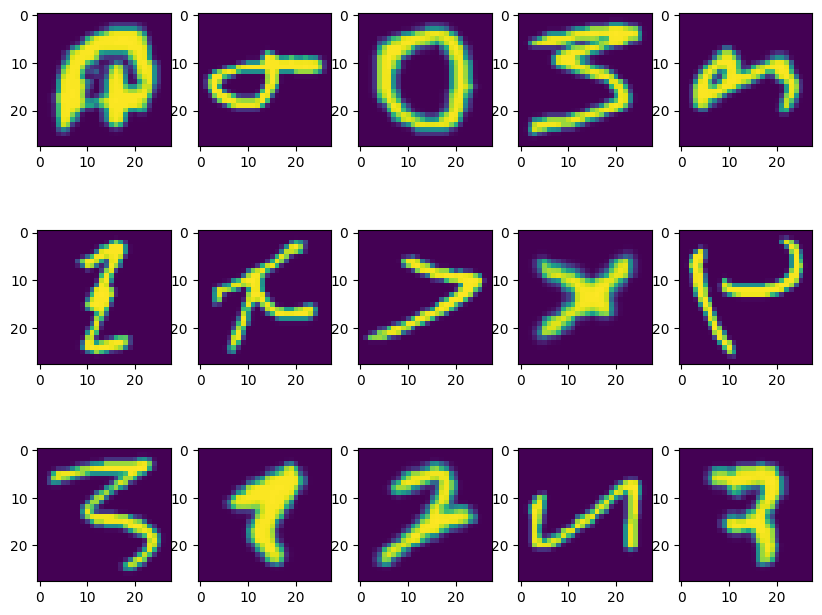

In [15]:
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x1[i].reshape([28,28]))

In [17]:
# Transform labels
number_of_classes = 37
y1 = tf.keras.utils.to_categorical(y1, number_of_classes)
y2 = tf.keras.utils.to_categorical(y2, number_of_classes)

In [18]:
Checkpoint = ModelCheckpoint('Best_points.keras',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')

In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_x,train_y,epochs=10,validation_data=(test_x,test_y),callbacks=[Checkpoint])

NameError: name 'model' is not defined

In [20]:
def identity_block(X, f, filters):
    regularizer = tf.keras.regularizers.l2(1e-4)
    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value. You'll need this later to add back to the main path.
    X_shortcut = X

    # First component of main path
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=regularizer)(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', kernel_regularizer=regularizer)(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=regularizer)(X)
    X = BatchNormalization(axis=3)(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = layers.Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [21]:
def convolutional_block(X, f, filters,s=2):
    
    regularizer = tf.keras.regularizers.l2(1e-4)
    # Retrieve Filters
    F1, F2, F3 = filters
    kernel_initializetion= glorot_uniform(seed=0)
    # Save the input value
    X_shortcut = X

    ### MAIN PATH ###
    # First component of main path
    X = Conv2D(F1, (1, 1), strides=(s, s), kernel_initializer=kernel_initializetion, kernel_regularizer=regularizer)(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv2D(F2, (f, f), strides=(1, 1), padding='same', kernel_initializer=kernel_initializetion, kernel_regularizer=regularizer)(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(F3, (1, 1), strides=(1, 1), kernel_initializer=kernel_initializetion, kernel_regularizer=regularizer)(X)
    X = BatchNormalization(axis=3,)(X)

    ### SHORTCUT PATH ###
    X_shortcut = Conv2D(F3, (1, 1), strides=(s, s), kernel_initializer=kernel_initializetion, kernel_regularizer=regularizer)(X_shortcut)
    X_shortcut = BatchNormalization(axis=3)(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = layers.Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [25]:
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model
from keras.initializers import glorot_uniform

# Define input shape and number of classesstride
input_shape = (224, 224, 3)
classes = 37
regularizer = tf.keras.regularizers.l2(1e-4)

kernel_initializetion= glorot_uniform(seed=0)
# Define the input as a tensor with shape input_shape
X_input = Input(input_shape)

# Zero-Padding
X = ZeroPadding2D((3, 3))(X_input)

# Stage 1 - Modify to reduce downsampling
X = Conv2D(64, (3, 3), strides=(1, 1),kernel_initializer=kernel_initializetion, kernel_regularizer=regularizer)(X)
X = BatchNormalization(axis=3)(X)
X = Activation('relu')(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)

# Stage 3
X = convolutional_block(X, f=3, filters=[128, 128, 512],s=2)
X = identity_block(X, 3, [128, 128, 512])
X = identity_block(X, 3, [128, 128, 512])
X = identity_block(X, 3, [128, 128, 512])

# Stage 4
X = convolutional_block(X, f=3, filters=[256, 256, 1024],s=2)
X = identity_block(X, 3, [256, 256, 1024])
X = identity_block(X, 3, [256, 256, 1024])
X = identity_block(X, 3, [256, 256, 1024])
X = identity_block(X, 3, [256, 256, 1024])
X = identity_block(X, 3, [256, 256, 1024])

# Stage 5
X = convolutional_block(X, f=3, filters=[512, 512, 2048],s=2)
X = identity_block(X, 3, [512, 512, 2048])
X = identity_block(X, 3, [512, 512, 2048])

# AVGPOOL
X = AveragePooling2D((2, 2), name='avg_pool')(X)

# Output layer
X = Flatten()(X)
X = Dense(classes, activation='softmax')(X)

# Create model
ResNet50 = Model(inputs=X_input, outputs=X, name='ResNet50')

# Compile the model
ResNet50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
ResNet50.summary()

Model: "ResNet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_43 (Conv2D)  │ (None, 228, 228,  │      1,792 │ zero_padding2d_1… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 228, 228,  │        256 │ conv2d_43[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_40       │ (None, 228, 228,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 114, 114,  │          0 │ activation_40[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_44 (Conv2D)  │ (None, 57, 57,    │      8,320 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 57, 57,    │        512 │ conv2d_44[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_41       │ (None, 57, 57,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_45 (Conv2D)  │ (None, 57, 57,    │    147,584 │ activation_41[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 57, 57,    │        512 │ conv2d_45[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_42       │ (None, 57, 57,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_46 (Conv2D)  │ (None, 57, 57,    │     66,048 │ activation_42[0]… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_47 (Conv2D)  │ (None, 57, 57,    │     33,280 │ max_pooling2d_1[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 57, 57,    │      2,048 │ conv2d_46[0][0]   │
│ (BatchNormalizatio… │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 57, 57,    │      2,048 │ conv2d_47[0][0]   │
│ (BatchNormalizatio… │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_13 (Add)        │ (None, 57, 57,    │          0 │ batch_normalizat

 Total params: 26,950,181 (102.81 MB)

 Trainable params: 26,899,877 (102.61 MB)

 Non-trainable params: 50,304 (196.50 KB)

In [ ]:
history = ResNet50.fit(train_dataset, validation_data=test_dataset, epochs=10, callbacks=[Checkpoint])

Epoch 1/10


I0000 00:00:1734432049.593813     112 service.cc:145] XLA service 0x7e4578003540 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734432049.593876     112 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
2024-12-17 10:41:00.743822: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[32,1024,29,29]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,2048,15,15]{3,2,1,0}, f32[2048,1024,1,1]{3,2,1,0}), window={size=1x1 stride=2x2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-12-17 10:41:01.777756: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2.03405454s
Trying algorithm eng0{} for con

2774/2775 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 0.7060 - loss: 4.2033

2024-12-17 11:05:03.037232: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[31,1024,29,29]{3,2,1,0}, u8[0]{0}) custom-call(f32[31,2048,15,15]{3,2,1,0}, f32[2048,1024,1,1]{3,2,1,0}), window={size=1x1 stride=2x2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-12-17 11:05:03.980169: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.943063657s
Trying algorithm eng0{} for conv (f32[31,1024,29,29]{3,2,1,0}, u8[0]{0}) custom-call(f32[31,2048,15,15]{3,2,1,0}, f32[2048,1024,1,1]{3,2,1,0}), window={size=1x1 stride=2x2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn

2775/2775 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.7060 - loss: 4.2025
Epoch 1: val_accuracy improved from -inf to 0.82911, saving model to Best_points.keras
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 1561s 542ms/step - accuracy: 0.7061 - loss: 4.2018 - val_accuracy: 0.8291 - val_loss: 1.3439
Epoch 2/10
 983/2775 ━━━━━━━━━━━━━━━━━━━━ 15:10 508ms/step - accuracy: 0.8908 - loss: 1.0948

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# 1. Plot Training and Validation Accuracy
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Accuracy subplot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Loss subplot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
plot_training_history(history)
    


In [ ]:
def plot_confusion_matrix(model, x_test, y_test, class_names):
    # Predict the values from the test dataset
    y_pred = model.predict(x_test)
    
    # Convert predictions to class labels
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    
    # Normalize the confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Plot confusion matrix
    plt.figure(figsize=(20, 16))
    
    # heatmap 
    sns.heatmap(cm, 
                annot=True, 
                fmt='d', 
                cmap='Blues', 
                cbar=True,
                xticklabels=class_names, 
                yticklabels=class_names)
    
    plt.title('Confusion Matrix', fontsize=16)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)#training_letters
    
    y1 = np.array(training_letter.iloc[:,0].values)
    x1 = np.array(training_letter.iloc[:,1:].values)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.tight_layout()
    plt.show()
    
    # Optional: Normalized Confusion Matrix
    plt.figure(figsize=(20, 16))
    sns.heatmap(cm_normalized, 
                annot=True, 
                fmt='.2f', 
                cmap='Blues', 
                cbar=True,
                xticklabels=class_names, 
                yticklabels=class_names)
    
    plt.title('Normalized Confusion Matrix', fontsize=16)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.tight_layout()
    plt.show()
    
class_names = [
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 
    'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 
    'U', 'V', 'W', 'X', 'Y', 'Z'
]  # Adjust based on your specific dataset

plot_confusion_matrix(model, test_x, test_y, class_names)

In [5]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
base_model = InceptionV3(weights='imagenet', include_top=False)
base_model.trainable = False
inputs = tf.keras.Input(shape=(224, 224, 3))  # Define input shape
x = base_model(inputs, training=False)       # Use the base model
x = GlobalAveragePooling2D()(x)             # Add a global average pooling layer
x = Dense(1024, activation='relu')(x)       # Add a dense layer
outputs = Dense(37, activation='softmax')(x)  # Output layer for 10 classes
mode_inception = Model(inputs, outputs)
mode_inception.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])



87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [8]:
history_inception = mode_inception.fit(train_dataset, validation_data=test_dataset,epochs=10,callbacks=[Checkpoint])

NameError: name 'train_dataset' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# After training the model
# Assuming you've trained your model and stored the history

# 1. Plot Training and Validation Accuracy
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    # Accuracy subplot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Loss subplotbalanced
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, x_test, y_test, class_names):
    # Predict the values from the test dataset
    y_pred = model.predict(x_test)
    
    # Convert predictions to class labels
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    
    # Normalize the confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Plot confusion matrix
    plt.figure(figsize=(20, 16))
    
    # Use improved heatmap with rotated x-axis labels
    sns.heatmap(cm, 
                annot=True, 
                fmt='d', 
                cmap='Blues', 
                cbar=True,
                xticklabels=class_names, 
                yticklabels=class_names)
    
    plt.title('Confusion Matrix', fontsize=16)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)#training_letters
    
    y1 = np.array(training_letter.iloc[:,0].values)
    x1 = np.array(training_letter.iloc[:,1:].values)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.tight_layout()
    plt.show()
    
    # Optional: Normalized Confusion Matrix
    plt.figure(figsize=(20, 16))
    sns.heatmap(cm_normalized, 
                annot=True, 
                fmt='.2f', 
                cmap='Blues', 
                cbar=True,
                xticklabels=class_names, 
                yticklabels=class_names)
    
    plt.title('Normalized Confusion Matrix', fontsize=16)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)

class_names = [
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 
    'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 
    'U', 'V', 'W', 'X', 'Y', 'Z'
]  # Adjust based on your specific dataset

plot_confusion_matrix(model, test_x, test_y, class_names)